# Homework 6
Łukasz Wyszomierski


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## World happiness dataset
The dataset we are going to work with is about a survey of the state of global happiness and contains such columns:
<ol>
    <li>Country name: Name of the country.
    <li>Regional indicator: Region to which the country belongs.
    <li>Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
    <li>Upper whisker: Upper bound of the happiness score.
    <li>Lower whisker: Lower bound of the happiness score.
    <li>Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.
    <li>Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
    <li>Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.
    <li>Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.
    <li>Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
    <li>Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.
    <li>Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.
    <li>Positive affect: The national average of responses to questions about positive emotions experienced yesterday.
    <li>Negative affect: The national average of responses to questions about negative emotions experienced yesterday.
<ol>

In [11]:
df = pd.read_csv("C:\WdED\World-happiness-report-2024.csv")
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


Let's find the size of the data frame and the types of data in it

In [7]:
print(f"Size of the data frame: {df.shape}")
print("Data types:")
df.info()

Size of the data frame: (234, 16)
Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       234 non-null    int64  
 1   Rank             234 non-null    int64  
 2   country          234 non-null    object 
 3   country_code     234 non-null    object 
 4   1980             234 non-null    float64
 5   2000             234 non-null    int64  
 6   2010             234 non-null    int64  
 7   2021             234 non-null    int64  
 8   2022             234 non-null    int64  
 9   2030             234 non-null    int64  
 10  2050             234 non-null    int64  
 11  area             234 non-null    float64
 12  landAreaKm       234 non-null    float64
 13  growthRate       234 non-null    float64
 14  worldPercentage  234 non-null    float64
 15  density          234 non-null    float64
dtypes: float64(6), i

Let's count the basic statistics of each variable

In [8]:
df.describe()

,Unnamed: 0,Rank,1980,2000,2010,2021,2022,2030,2050,area,landAreaKm,growthRate,worldPercentage,density
count,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,116.500000,117.500000,1.898462e+07,2.626947e+07,2.984524e+07,3.379317e+07,3.407441e+07,3.651461e+07,4.148628e+07,5.814500e+05,5.571123e+05,0.009577,0.004271,448.756346
std,67.694165,67.694165,8.178519e+07,1.116982e+08,1.242185e+08,1.362316e+08,1.367664e+08,1.417827e+08,1.481676e+08,1.761841e+06,1.689972e+06,0.013385,0.017150,1969.252241
min,0.000000,1.000000,7.330000e+02,6.510000e+02,5.960000e+02,5.110000e+02,5.100000e+02,5.610000e+02,7.310000e+02,4.400000e-01,4.400000e-01,-0.088000,0.000000,0.137600
25%,58.250000,59.250000,2.296142e+05,3.272420e+05,3.931490e+05,4.172728e+05,4.197385e+05,4.561490e+05,5.466058e+05,2.650000e+03,2.625875e+03,0.001775,0.000100,39.676850
50%,116.500000,117.500000,3.141146e+06,4.292907e+06,4.942770e+06,5.496573e+06,5.559944e+06,6.178231e+06,6.352397e+06,8.119950e+04,7.568925e+04,0.007900,0.000700,97.322900
75%,174.750000,175.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.187210e+07,2.247650e+07,2.616311e+07,3.568614e+07,4.304258e+05,4.047876e+05,0.016950,0.002800,239.852875
max,233.000000,234.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.425893e+09,1.425887e+09,1.514994e+09,1.670491e+09,1.709824e+07,1.637687e+07,0.069100,0.178800,21129.726400


## Analysis of data in groups

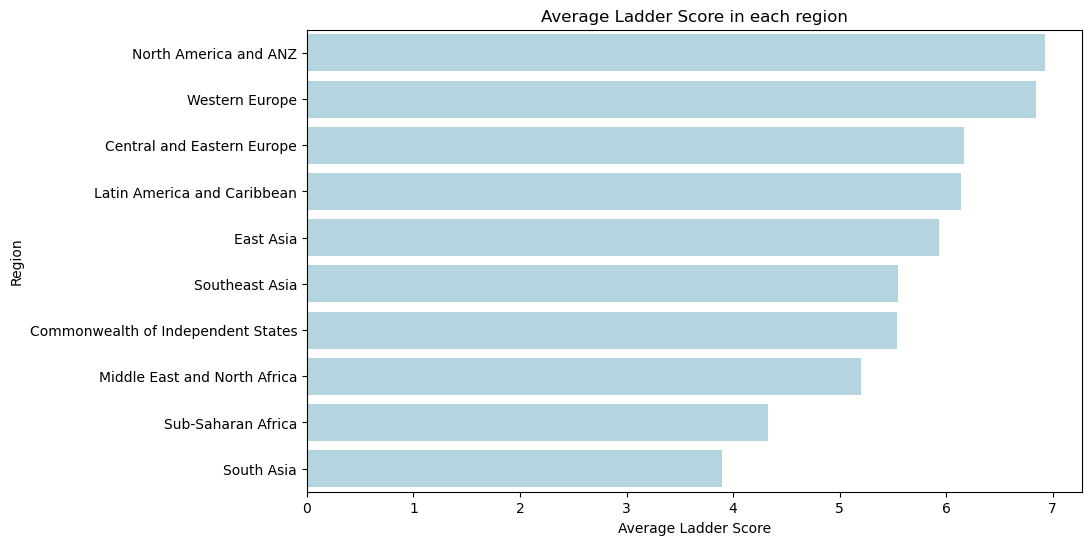

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False).reset_index(),
            x='Ladder score', y='Regional indicator', color = 'lightblue')
plt.title('Average Ladder Score in each region')
plt.xlabel('Average Ladder Score')
plt.ylabel('Region')
plt.show()

The happiest region is North America and the second happiest region is the Western Europe

Now let's find the happeiest countries and the least happy countries.

In [32]:
df_sorted = df.sort_values(by='Ladder score', ascending=False)
countries1 = df_sorted[['Country name', 'Ladder score']].head(10)
countries2 = df_sorted[['Country name', 'Ladder score']].tail(10)
print("Top 10 countries with the highest Ladder score:")
print(countries1)
print("\nTen countries with the lowest Ladder score:")
print(countries2)

Top 10 countries with the highest Ladder score:
  Country name  Ladder score
0      Finland         7.741
1      Denmark         7.583
2      Iceland         7.525
3       Sweden         7.344
4       Israel         7.341
5  Netherlands         7.319
6       Norway         7.302
7   Luxembourg         7.122
8  Switzerland         7.060
9    Australia         7.057

Ten countries with the lowest Ladder score:
         Country name  Ladder score
134          Eswatini         3.502
133            Zambia         3.502
135            Malawi         3.421
136          Botswana         3.383
137          Zimbabwe         3.341
138  Congo (Kinshasa)         3.295
139      Sierra Leone         3.245
140           Lesotho         3.186
141           Lebanon         2.707
142       Afghanistan         1.721


## Distribution of variables in the data set

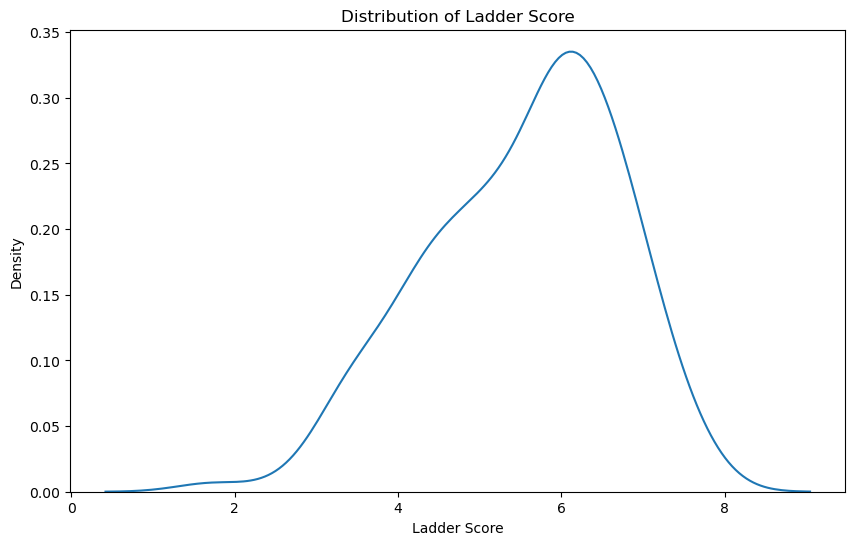

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Ladder score'])
plt.title('Distribution of Ladder Score')
plt.xlabel('Ladder Score')
plt.ylabel('Density')
plt.show()

The highest number of countries achieve happiness level of about 6. Few countries have Ladder Score higher than 8 or lower than 2.

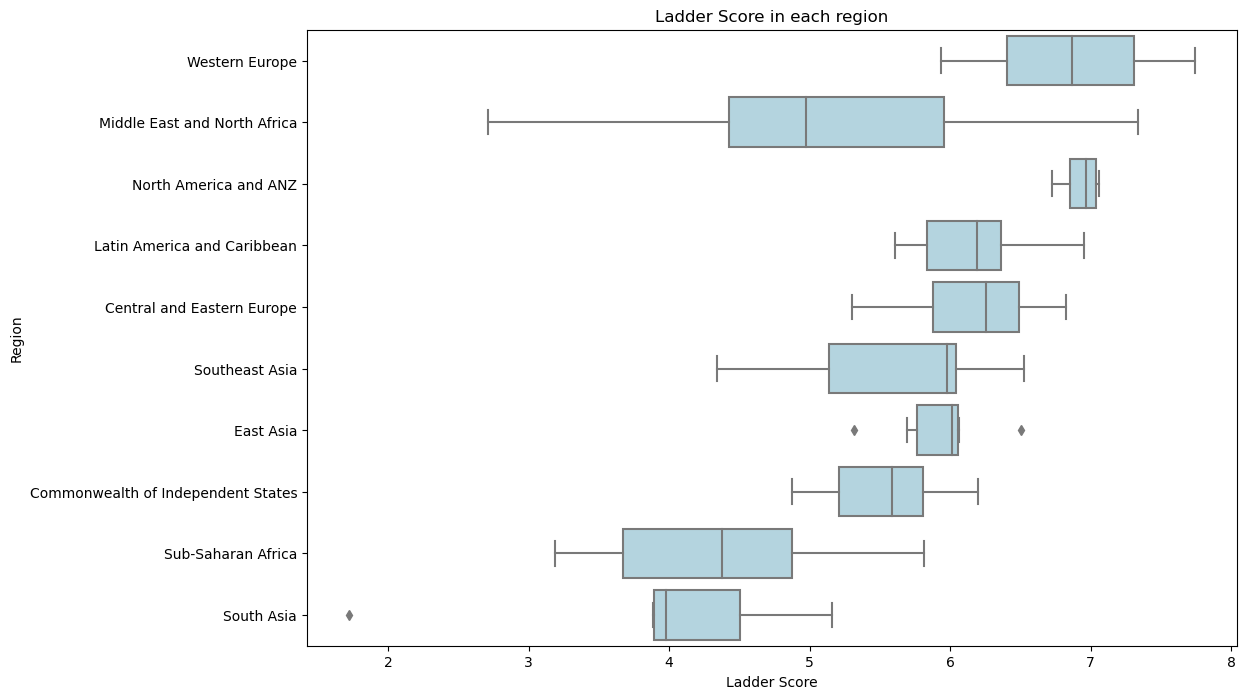

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df, y='Regional indicator', x='Ladder score', color = 'lightblue')
plt.title('Ladder Score in each region')
plt.xlabel('Ladder Score')
plt.ylabel('Region')

plt.show()

The biggest differences in happiness level occur in Middle East and North Africa whereas the smallest differences occur in North America. 

## Correlations in the dataset

Let's check the correlation between Ladder score and other columns

In [17]:
df1 = df.drop(columns=['lowerwhisker', 'upperwhisker'])
df1.corr(numeric_only=True)['Ladder score'].sort_values(ascending=False)

Ladder score                    1.000000
Social support                  0.813542
Log GDP per capita              0.768504
Healthy life expectancy         0.759659
Freedom to make life choices    0.644451
Dystopia + residual             0.533542
Perceptions of corruption       0.451829
Generosity                      0.130038
Name: Ladder score, dtype: float64

There is a high positive correlation between Ladder score and Social support, Log GDP per capita and Healthy life expectancy.

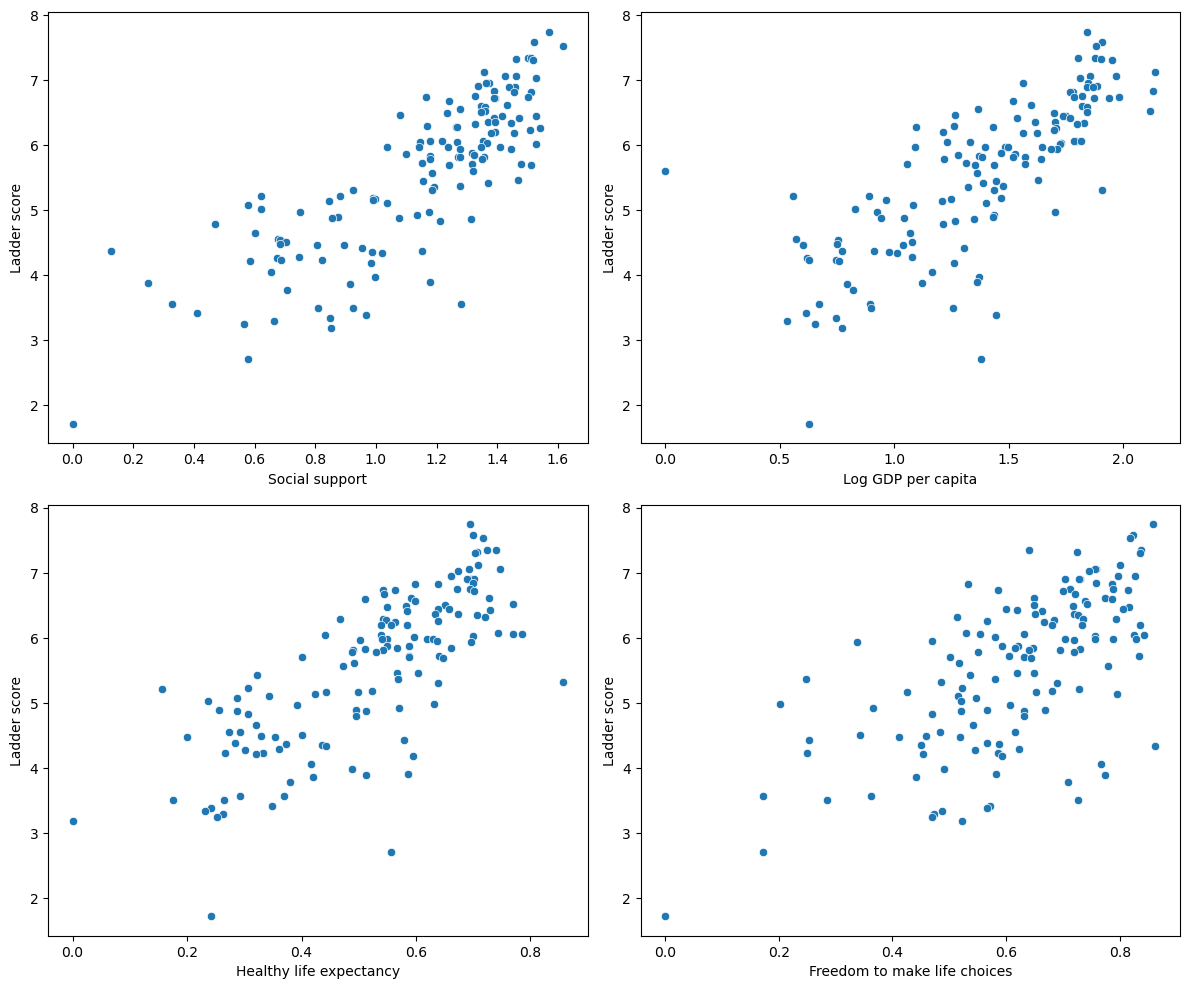

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x='Social support', y='Ladder score', ax=axs[0, 0])
sns.scatterplot(data=df, x='Log GDP per capita', y='Ladder score', ax=axs[0, 1])
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score', ax=axs[1, 0])
sns.scatterplot(data=df, x='Freedom to make life choices', y='Ladder score', ax=axs[1, 1])
plt.tight_layout()
plt.show()

From the plots above we can see that as social support, GDP per capita, healthy life expectancy and freedom to make life choices increases happiness level also increases.